In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd

In [ ]:
bert_scores = pd.read_csv('bert_scores.csv', index_col=0)
bayes_scores = pd.read_csv('bayes_scores.csv', index_col=0)
image_scores = pd.read_csv('image_scores.csv', index_col=0)

In [ ]:
df = bert_scores.join(bayes_scores.drop(columns=['2_way_label'])).join(image_scores.drop(columns=['2_way_label']))
df

2_way_label  bert_score  bayes_score  image_score
942             0   -0.571089     0.175013     0.985655
180             1    1.580122     0.889496     0.992218
1079            0    0.241635     0.922040     0.865050
1430            0    1.250819     0.370918     0.602334
1171            0    1.243760     0.660416     0.999492
...           ...         ...          ...          ...
1917            0    0.402701     0.018363     0.999140
1657            0    1.239460     0.487884     0.992870
1442            1    0.564928     0.908097     0.872285
803             1    0.169560     0.060811     0.999998
796             1    0.435838     0.759759     0.999440

[460 rows x 4 columns]

In [ ]:
logreg = LogisticRegression()
clf = logreg.fit(df[['bert_score', 'image_score']], df[['2_way_label']])
pred = clf.predict_proba(df[['bert_score', 'image_score']])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.61630741, 0.38369259],
       [0.24245965, 0.75754035],
       [0.48596587, 0.51403413],
       [0.34491184, 0.65508816],
       [0.29062216, 0.70937784],
       [0.69572984, 0.30427016],
       [0.39631137, 0.60368863],
       [0.33731863, 0.66268137],
       [0.26105339, 0.73894661],
       [0.51441376, 0.48558624],
       [0.308512  , 0.691488  ],
       [0.59006269, 0.40993731],
       [0.34957291, 0.65042709],
       [0.62663213, 0.37336787],
       [0.61950265, 0.38049735],
       [0.3046071 , 0.6953929 ],
       [0.57960762, 0.42039238],
       [0.6172129 , 0.3827871 ],
       [0.39691826, 0.60308174],
       [0.53248501, 0.46751499],
       [0.61209931, 0.38790069],
       [0.41837993, 0.58162007],
       [0.43323742, 0.56676258],
       [0.39349505, 0.60650495],
       [0.37097797, 0.62902203],
       [0.30112322, 0.69887678],
       [0.3261744 , 0.6738256 ],
       [0.50157989, 0.49842011],
       [0.60738195, 0.39261805],
       [0.40754414, 0.59245586],
       [0.

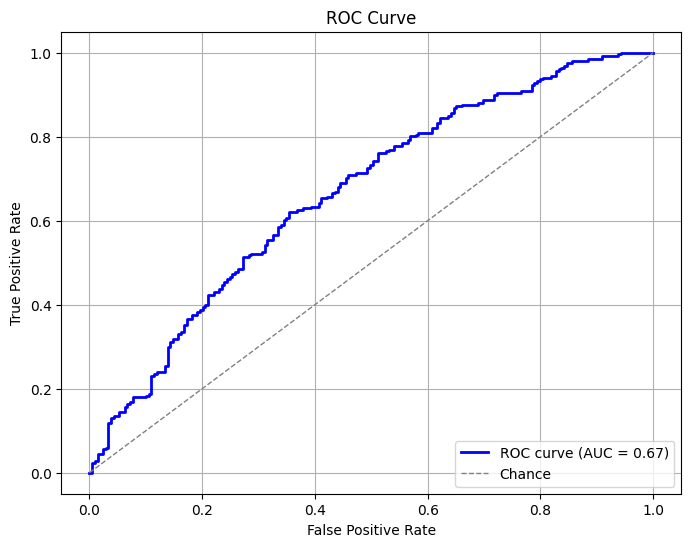

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = {
    'TrueLabel': list(df['2_way_label']),
    'Scores': pred[:, 1]
}
df = pd.DataFrame(data)

fpr, tpr, thresholds = roc_curve(df['TrueLabel'], df['Scores'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Chance')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()